In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import NaN
from scipy import stats
import statistics
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from scipy import linalg
from sklearn.decomposition import FastICA, PCA
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import plot_confusion_matrix

In [2]:
# the following lines must be uncommented if you want to have interactive plots
%matplotlib inline  
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['linalg']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
WTvsMUT_bundle = pd.read_csv('WTvsMutLog2FC.txt',sep='\t',index_col='gene')

WT_data =  WTvsMUT_bundle.filter(regex='B6_\d+ng_B6_NT1')
mut_data = WTvsMUT_bundle.filter(regex='1h_\d+ng_1h_NT1')
WTvsMUT_all = pd.concat([WT_data,mut_data],axis=1).fillna(0)

WTvsMUT = WTvsMUT_all[(WTvsMUT_all.T != 0).any()]

WTvsMUT

,B6_2ng_B6_NT1,B6_10ng_B6_NT1,B6_50ng_B6_NT1,1h_2ng_1h_NT1,1h_10ng_1h_NT1,1h_50ng_1h_NT1
gene,,,,,,
Gsta3,2.798340,3.42470,3.255930,2.647470,3.201720,2.537300
Cd28,-1.389800,-3.52847,-4.290400,-1.521790,-4.016830,0.000000
Stk36,-2.133620,0.00000,0.000000,0.000000,0.000000,0.000000
Ramp1,-1.499170,-3.76724,-5.367170,-2.150380,-4.725410,0.000000
Serpinb12,2.266460,2.57571,2.215400,0.000000,2.259490,0.000000
Tnfsf4,2.607320,3.87224,6.550920,2.713020,5.556300,6.288090
Fcgr4,-1.050890,0.00000,0.000000,-0.875810,1.654800,1.172200
Slamf9,0.835011,2.35234,3.502040,0.881447,2.806460,2.992860
Tagln2,0.880628,1.16298,1.068210,0.000000,0.000000,0.000000


In [4]:
pca = PCA(n_components=3)
Spca = pca.fit_transform(WTvsMUT.transpose())
print("Explained variances by components: ", pca.explained_variance_ratio_, "total variance explained: ",sum(pca.explained_variance_ratio_))
PCA_WTvsMUT = pd.DataFrame(Spca,columns=['PC1','PC2','PC3'],index=WTvsMUT.columns)
PCA_WTvsMUT

Explained variances by components:  [0.56593421 0.18295973 0.1563747 ] total variance explained:  0.9052686487477098


,PC1,PC2,PC3
B6_2ng_B6_NT1,-50.415666,-24.249167,-1.027338
B6_10ng_B6_NT1,6.631894,0.237829,-33.851685
B6_50ng_B6_NT1,80.938935,-27.596320,8.315959
1h_2ng_1h_NT1,-46.858920,-12.983216,5.174632
1h_10ng_1h_NT1,11.065471,39.355359,-18.409268
1h_50ng_1h_NT1,-1.361713,25.235514,39.797700


<IPython.core.display.Javascript object>


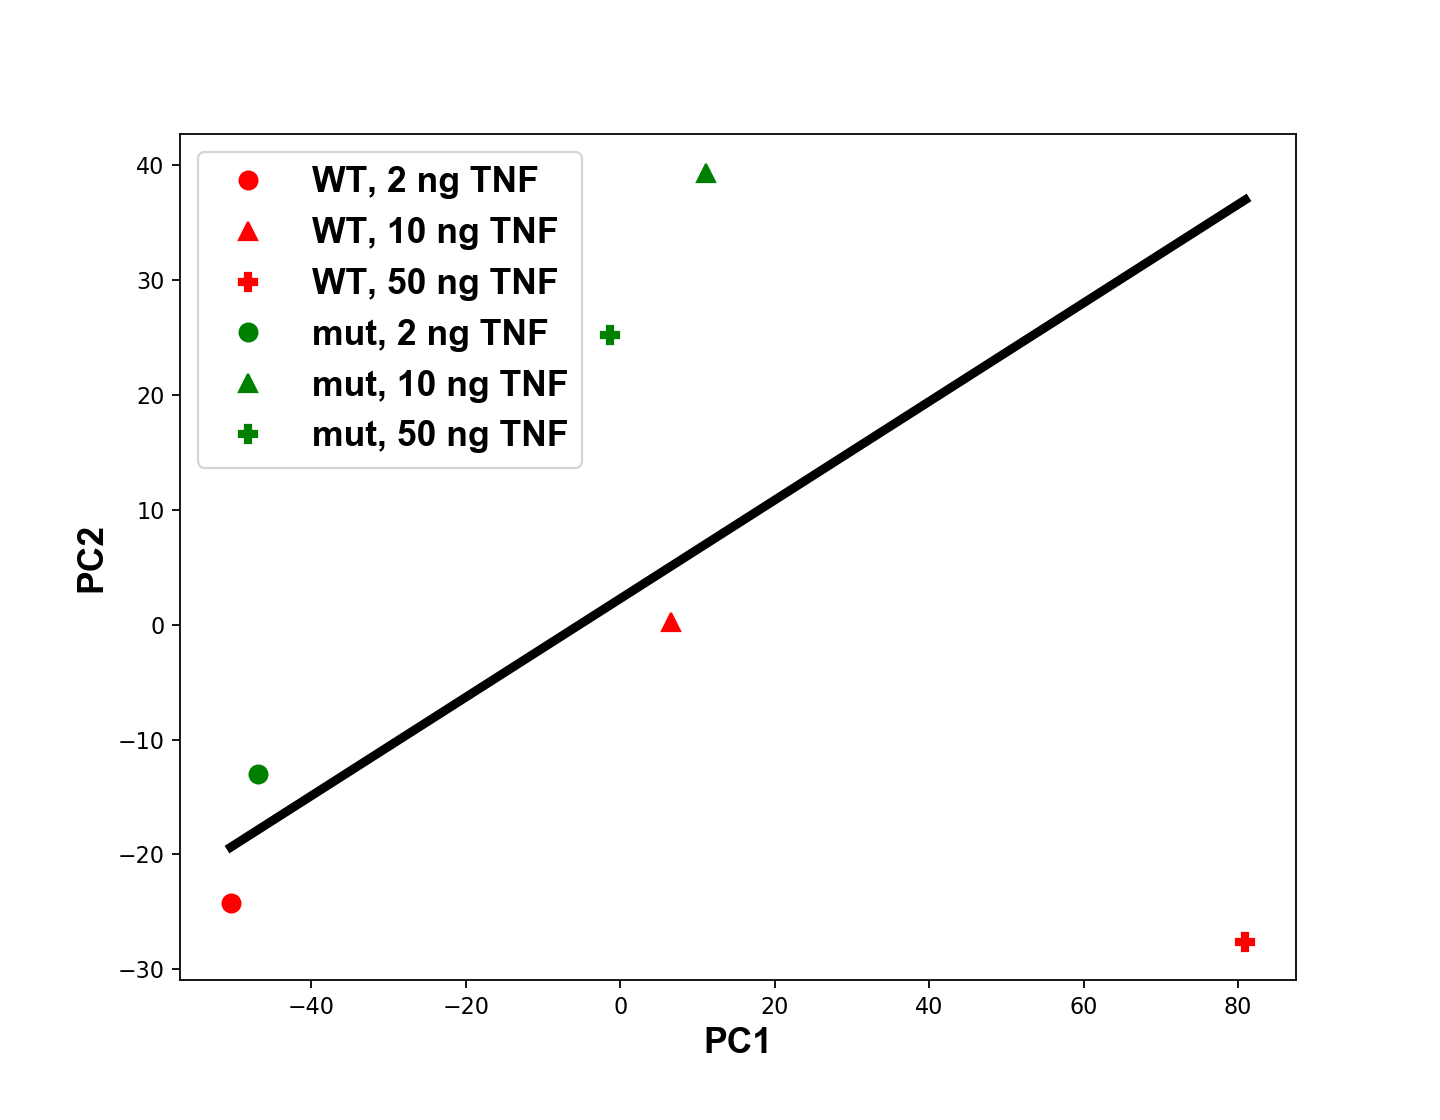

In [5]:

svc_PCA = SVC(kernel='linear')
svc_PCA.fit(PCA_WTvsMUT.iloc[:,:2],[1,1,1,0,0,0])
norm_vec_PCA = svc_PCA.coef_[0]
b_coef_PCA = svc_PCA.intercept_[0]

x_min = min(PCA_WTvsMUT['PC1'])
x_max = max(PCA_WTvsMUT['PC1'])
y_min = -(b_coef_PCA + norm_vec_PCA[0]*x_min)/norm_vec_PCA[1]
y_max = -(b_coef_PCA + norm_vec_PCA[0]*x_max)/norm_vec_PCA[1]



fig = plt.figure(figsize=(9,7))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

ax.plot([x_min,x_max],[y_min,y_max],'-',linewidth=4,color='black')

ax.plot(PCA_WTvsMUT.filter(regex='B6_2ng',axis=0).iloc[:,0],PCA_WTvsMUT.filter(regex='B6_2ng',axis=0).iloc[:,1],'o',color='red',label='WT, 2 ng TNF',ms=8) 
ax.plot(PCA_WTvsMUT.filter(regex='B6_10ng',axis=0).iloc[:,0],PCA_WTvsMUT.filter(regex='B6_10ng',axis=0).iloc[:,1],'^',color='red',label='WT, 10 ng TNF',ms=8) 
ax.plot(PCA_WTvsMUT.filter(regex='B6_50ng',axis=0).iloc[:,0],PCA_WTvsMUT.filter(regex='B6_50ng',axis=0).iloc[:,1],'P',color='red',label='WT, 50 ng TNF',ms=8) 

ax.plot(PCA_WTvsMUT.filter(regex='1h_2ng',axis=0).iloc[:,0],PCA_WTvsMUT.filter(regex='1h_2ng',axis=0).iloc[:,1],'o',color='green',label='mut, 2 ng TNF',ms=8) 
ax.plot(PCA_WTvsMUT.filter(regex='1h_10ng',axis=0).iloc[:,0],PCA_WTvsMUT.filter(regex='1h_10ng',axis=0).iloc[:,1],'^',color='green',label='mut, 10 ng TNF',ms=8) 
ax.plot(PCA_WTvsMUT.filter(regex='1h_50ng',axis=0).iloc[:,0],PCA_WTvsMUT.filter(regex='1h_50ng',axis=0).iloc[:,1],'P',color='green',label='mut, 50 ng TNF',ms=8) 

ax.set_xlabel('PC1',**fontLabel)
ax.set_ylabel('PC2',**fontLabel)
#ax.set_zlabel('PC3',**fontLabel)

ax.legend(numpoints=1,prop=fontLabel)
plt.show()



In [6]:
pert_ds = pd.read_csv('normalized_counts_TB.txt',sep='\t',index_col=0).filter(regex='^[^H]+$',axis=1)
pert_ds

,UNTREAT1,UNTREAT2,UNTREAT3,T_1,T_2,T_3,M_1,M_2,M_3,TM_1,...,TM_b_3,TMR_b_1,TMR_b_2,TMR_b_3,TMS_1,TMS_2,TMS_3,TMRS_1,TMRS_2,TMRS_3
Ctsb,402861.271325,392408.226324,385106.962016,389676.910972,398283.058083,381025.421369,358720.127386,366727.421325,367830.265694,376680.030307,...,338272.517382,196633.840386,199448.444744,210511.870476,403630.001361,386769.164022,376478.526919,210915.877975,198750.848298,196538.425133
Psap,329521.286666,343883.816237,324431.543918,328100.521596,333329.947194,311751.497654,303885.764907,307491.854229,310839.729862,305639.362463,...,238147.931249,196784.088911,202849.111096,200733.586005,323709.892772,323927.209093,318424.193161,208008.652304,191327.054980,189995.276590
Lyz2,272384.752389,271653.777906,268205.648869,253598.758684,260538.405828,252244.504254,250180.858630,239853.941944,254525.991992,246698.569296,...,165326.885238,141834.608188,149177.170986,158207.847774,249045.852018,237296.524931,227901.962556,177722.708856,137015.324465,136099.211831
Fth1,155467.086091,156993.277525,150595.289324,221034.029438,224936.823602,208263.486354,165827.096151,181805.629580,172456.226978,214496.669402,...,179652.945735,109249.113530,110716.950653,112833.677581,225628.763053,226193.915915,206943.737479,119660.594305,107109.436426,104402.397789
Gpnmb,155037.779724,157331.767089,156767.760867,207262.365097,209482.924034,199871.944146,175341.239785,180309.098551,183262.371582,209885.674120,...,205924.353393,79782.888876,86176.748800,91451.410266,220161.290942,212540.506872,211905.912871,87189.626963,81716.356258,80799.608703
Ctsd,123691.362655,122569.570312,121501.551372,161855.651821,160256.617449,144216.874823,117331.990644,125071.741479,121242.981820,154596.894309,...,141067.130059,124784.626725,120974.141549,132412.128264,168413.705951,166582.620812,152030.874175,130730.154136,122057.502789,122878.971070
mt.Co1,143873.169578,141447.746709,125210.058136,128659.866849,131959.250218,127306.090750,114144.484360,126306.811955,114708.770864,121562.688185,...,110486.917535,96474.301771,93371.854045,85125.684108,139074.974152,128988.813344,125422.428303,90282.977118,94028.537003,82338.047489
Eef1a1,89270.159941,86727.160192,85288.804897,108274.513120,108162.135597,105560.513928,93300.023106,95365.956617,94305.857399,106448.870317,...,108181.254309,94669.475924,95620.921461,101526.525321,125093.252928,117887.264952,115096.717700,95404.308634,92566.215560,91539.977989
Selenop,207155.749014,207188.553887,194660.068132,166888.321238,177631.552315,161231.284028,161361.853102,166071.197967,161695.327920,148804.530884,...,73100.356221,29197.067786,33185.154237,26309.464754,140910.242037,130536.263340,122477.111144,34815.941967,28767.442992,26801.172707
Ftl1,85884.193295,87658.574431,91904.287716,94365.368782,89808.846170,81780.116344,72721.625557,76202.017117,69957.155264,84417.621189,...,89465.149134,60992.605472,64713.491940,67211.197187,94477.964542,92382.446552,82479.945533,67627.168132,64771.377290,66440.846700


In [7]:
norm1_df = np.log2(pert_ds.iloc[:,:21].divide(pert_ds.filter(regex='UNTREAT').mean(axis=1),axis=0)).replace([np.inf, -np.inf], np.nan).fillna(0).copy()

norm2_df = np.log2(pert_ds.iloc[:,21:].divide(pert_ds.filter(regex='UNTREAT').mean(axis=1),axis=0)).replace([np.inf, -np.inf], np.nan).fillna(0).copy()

logfc_df = pd.concat([norm1_df,norm2_df],axis=1)
#logfc_df

logfc_names = logfc_df
logfc_names

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until


,UNTREAT1,UNTREAT2,UNTREAT3,T_1,T_2,T_3,M_1,M_2,M_3,TM_1,...,TM_b_3,TMR_b_1,TMR_b_2,TMR_b_3,TMS_1,TMS_2,TMS_3,TMRS_1,TMRS_2,TMRS_3
Ctsb,0.034070,-0.003857,-0.030953,-0.013934,0.017581,-0.046325,-0.133354,-0.101505,-0.097172,-0.062873,...,-0.218027,-1.000701,-0.980197,-0.902311,0.036821,-0.024740,-0.063645,-0.899545,-0.985252,-1.001401
Psap,-0.013469,0.048080,-0.035927,-0.019703,0.003110,-0.093445,-0.130312,-0.113293,-0.097670,-0.122011,...,-0.481983,-0.757228,-0.713434,-0.728559,-0.039140,-0.038171,-0.062891,-0.677198,-0.797800,-0.807878
Lyz2,0.008695,0.004818,-0.013611,-0.094403,-0.055455,-0.102128,-0.113980,-0.174795,-0.089138,-0.134202,...,-0.711630,-0.932741,-0.859924,-0.775130,-0.120540,-0.190260,-0.248538,-0.607323,-0.982614,-0.992292
Fth1,0.010386,0.024480,-0.035546,0.518045,0.543297,0.432187,0.103457,0.236174,0.160007,0.474732,...,0.218989,-0.498602,-0.479347,-0.452025,0.547728,0.551337,0.423015,-0.367275,-0.527138,-0.564068
Gpnmb,-0.012428,0.008762,0.003581,0.406410,0.421785,0.354028,0.165118,0.205424,0.228863,0.424556,...,0.397067,-0.970896,-0.859677,-0.773970,0.493513,0.442690,0.438376,-0.842819,-0.936351,-0.952628
Ctsd,0.012933,-0.000211,-0.012837,0.400896,0.386572,0.234428,-0.063215,0.028944,-0.015911,0.334700,...,0.202570,0.025628,-0.019113,0.111223,0.458198,0.442426,0.310553,0.092780,-0.006251,0.003426
mt.Co1,0.072269,0.047741,-0.128178,-0.088966,-0.052436,-0.104227,-0.261667,-0.115596,-0.254553,-0.170828,...,-0.308653,-0.504312,-0.551469,-0.684862,0.023334,-0.085283,-0.125733,-0.600003,-0.541358,-0.732897
Eef1a1,0.035582,-0.006112,-0.030240,0.314026,0.312528,0.277402,0.099281,0.130878,0.114751,0.289493,...,0.312783,0.120303,0.134730,0.221189,0.522336,0.436740,0.402179,0.131458,0.087890,0.071806
Selenop,0.029226,0.029454,-0.060533,-0.282607,-0.192602,-0.332358,-0.331191,-0.289688,-0.328212,-0.448072,...,-1.473540,-2.797595,-2.612880,-2.947836,-0.526714,-0.637039,-0.728978,-2.543670,-2.818981,-2.921122
Ftl1,-0.042997,-0.013495,0.054742,0.092868,0.021468,-0.113640,-0.283005,-0.215561,-0.338918,-0.067846,...,0.015936,-0.536755,-0.451323,-0.396688,0.094588,0.062229,-0.101346,-0.387787,-0.450033,-0.413319


In [8]:
metadata = pd.read_csv('TB_codes_ed.csv',index_col=0)
metadata

,Details,Abbreviation,Group
Code,,,
UNTREAT1,Untreated conditions,UNTREAT,UNTREAT
UNTREAT2,Untreated conditions,UNTREAT,UNTREAT
UNTREAT3,Untreated conditions,UNTREAT,UNTREAT
T_1,TNF treatment,T_1,T
T_2,TNF treatment,T_2,T
T_3,TNF treatment,T_3,T
M_1,MTB treatment,M_1,M
M_2,MTB treatment,M_2,M
M_3,MTB treatment,M_3,M


In [9]:
pca = PCA(n_components=3)
Spca = pca.fit_transform(logfc_df.transpose())
print("Explained variances by components: ", pca.explained_variance_ratio_, "total variance explained: ",sum(pca.explained_variance_ratio_))
PCA_pert = pd.DataFrame(Spca,columns=['PC1','PC2','PC3'],index=logfc_df.columns)
PCA_pert

Explained variances by components:  [0.25129622 0.06139994 0.04635269] total variance explained:  0.3590488620042524


,PC1,PC2,PC3
UNTREAT1,-52.825004,47.343442,19.925841
UNTREAT2,-57.575774,46.130550,25.782242
UNTREAT3,-55.983559,43.686148,22.831432
T_1,-42.526966,-3.344204,-18.064821
T_2,-36.225654,-0.117970,-31.629506
T_3,-42.943763,-5.407132,-17.506279
M_1,-43.646952,43.095307,-5.479890
M_2,-44.472656,41.577732,-10.802416
M_3,-48.737344,39.710118,-5.495342
TM_1,-36.484504,-15.145990,-8.973051


<IPython.core.display.Javascript object>


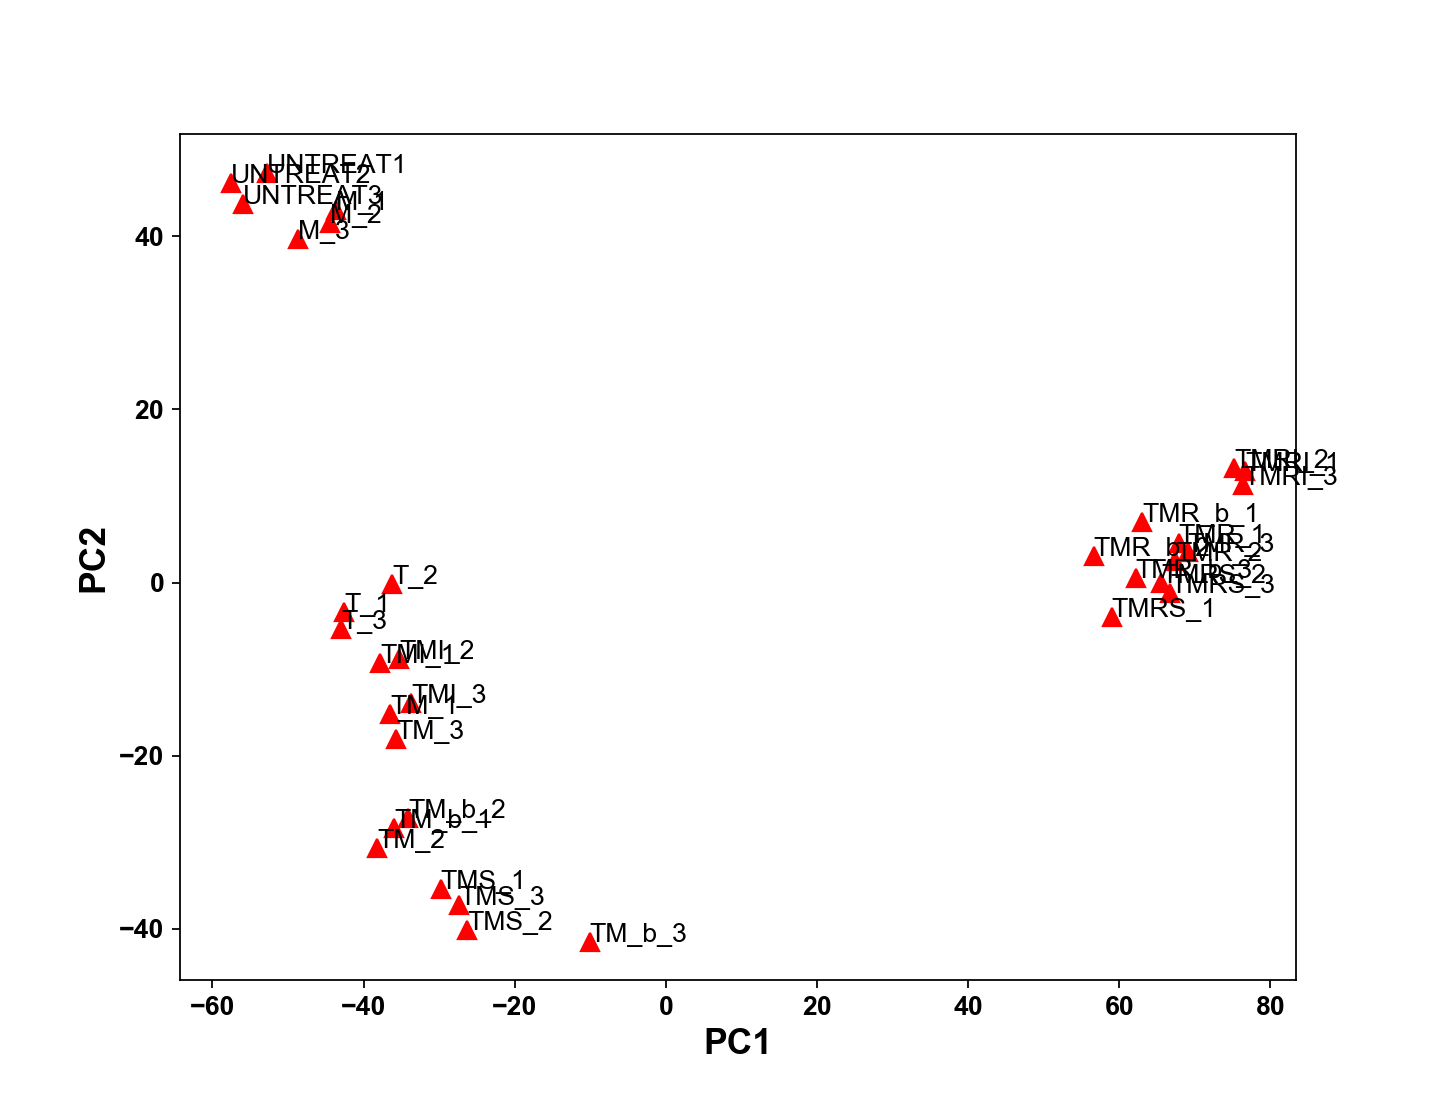

In [10]:
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'normal', 'size' : 12} 
plt.rc('font', **fontAxes)

ax.plot(PCA_pert.iloc[:,0],PCA_pert.iloc[:,1],'^',color='red',ms=8) 

ax.set_xlabel('PC1',**fontLabel)
ax.set_ylabel('PC2',**fontLabel)

for smpl in PCA_pert.index:
    ax.annotate(smpl,(PCA_pert.loc[smpl][0],PCA_pert.loc[smpl][1]))

plt.show()


<IPython.core.display.Javascript object>


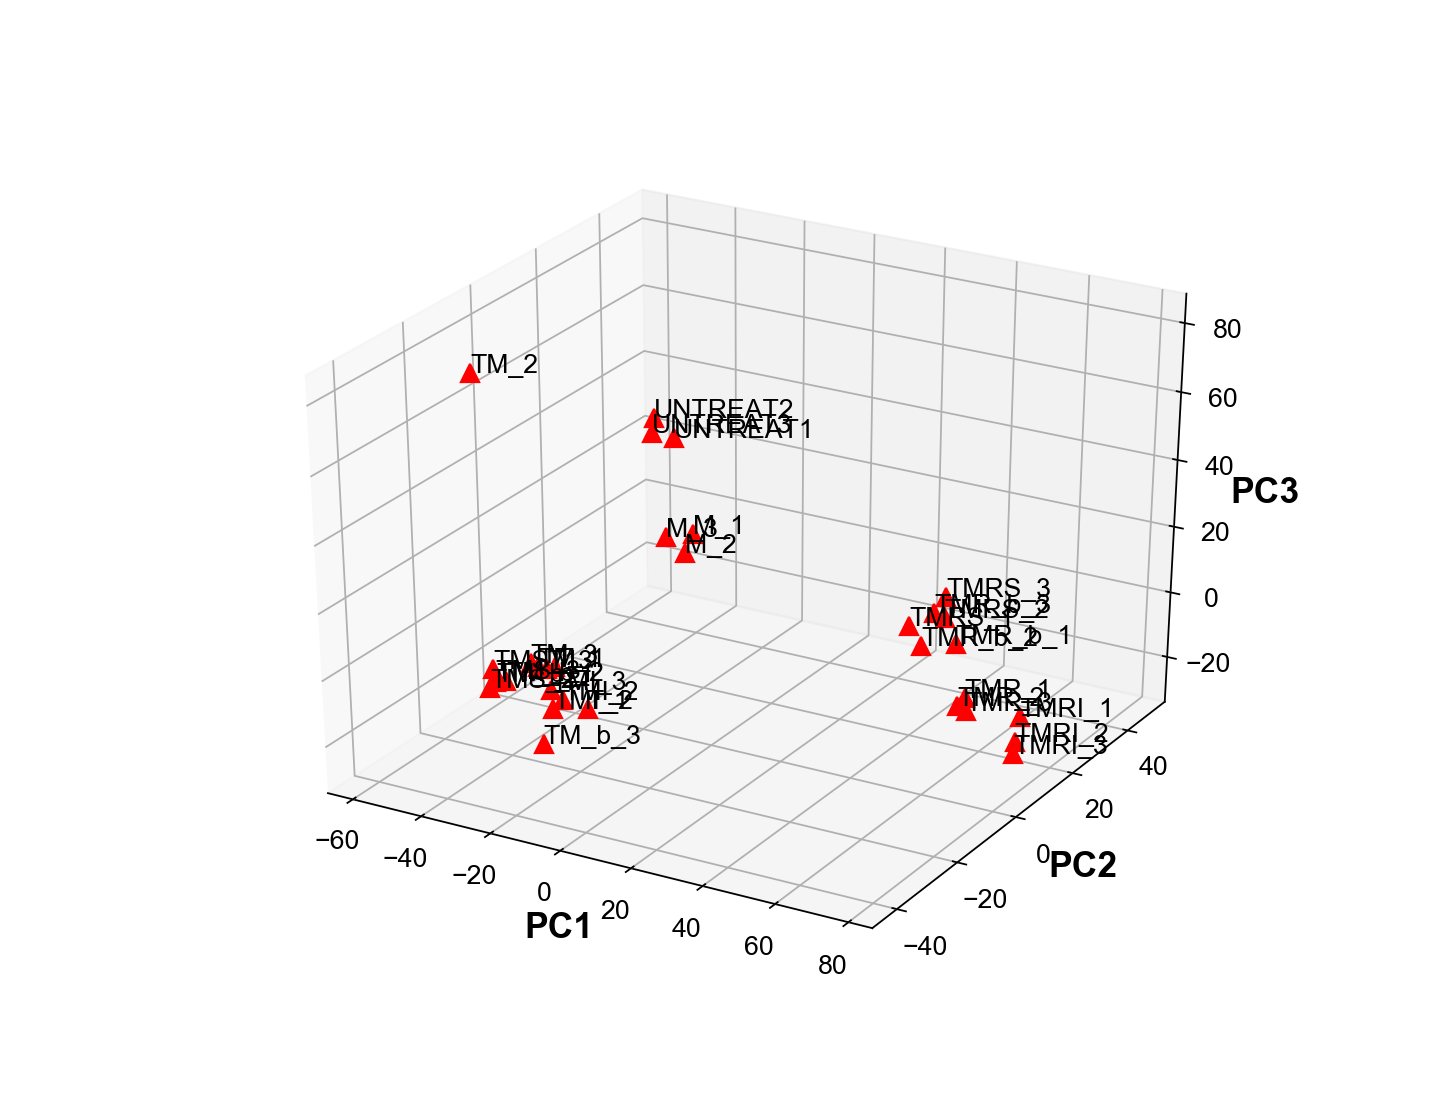

In [11]:
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'normal', 'size' : 12} 
plt.rc('font', **fontAxes)

ax.plot3D(PCA_pert.iloc[:,0],PCA_pert.iloc[:,1],PCA_pert.iloc[:,2],'^',color='red',ms=8) 

ax.set_xlabel('PC1',**fontLabel)
ax.set_ylabel('PC2',**fontLabel)
ax.set_zlabel('PC3',**fontLabel)

for smpl in PCA_pert.index:
    ax.text(PCA_pert.loc[smpl][0],PCA_pert.loc[smpl][1],PCA_pert.loc[smpl][2],smpl)

plt.show()



In [12]:
gene_names = list(set(WTvsMUT.index) & set(logfc_names.index))
print(len(gene_names))

WTvsMUT_com = WTvsMUT.loc[gene_names]
logfc_com = logfc_names.loc[gene_names]

logfc_com = logfc_com[~logfc_com.index.duplicated(keep='first')]

total_dataset_com = pd.concat([WTvsMUT_com,logfc_com],axis=1,sort=True)

total_dataset_com.at[:,'DMSO']=np.zeros(len(gene_names))

total_dataset_com


3845


,B6_2ng_B6_NT1,B6_10ng_B6_NT1,B6_50ng_B6_NT1,1h_2ng_1h_NT1,1h_10ng_1h_NT1,1h_50ng_1h_NT1,UNTREAT1,UNTREAT2,UNTREAT3,T_1,...,TMR_b_1,TMR_b_2,TMR_b_3,TMS_1,TMS_2,TMS_3,TMRS_1,TMRS_2,TMRS_3,DMSO
gene,,,,,,,,,,,,,,,,,,,,,
A230028O05Rik,0.000000,1.137350,1.274580,0.000000,1.203960,0.000000,-0.324403,0.041310,0.229370,-1.069684,...,0.292531,-0.262996,0.200643,-1.248351,-0.794541,-1.718944,0.429344,0.002344,-0.206289,0.0
A230050P20Rik,0.000000,0.000000,1.263020,0.000000,1.300780,1.479910,0.021969,0.000078,-0.022388,0.314495,...,0.040315,-0.232320,0.234028,0.731264,0.575553,0.409749,0.174073,0.448695,-0.151944,0.0
A230059L01Rik,0.000000,0.000000,-2.106410,0.000000,0.000000,0.000000,1.584963,0.000000,0.000000,0.000000,...,0.000000,0.852820,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
A430046D13Rik,0.000000,-1.204380,-2.853830,0.000000,-1.317190,0.000000,-0.144145,-0.263858,0.335971,-0.231596,...,-0.458263,-0.892229,-0.519564,-0.932031,-0.712687,-0.461518,-0.211083,-0.483397,-1.041973,0.0
A430108G06Rik,-1.469380,-4.483050,0.000000,-1.560030,-3.569200,0.000000,-0.239552,0.278164,-0.088744,0.422825,...,-2.064976,-1.194087,-2.406385,0.158428,0.179278,0.123337,-1.556195,-1.212677,-1.639287,0.0
A530017D24Rik,0.000000,0.000000,-1.317080,0.000000,0.000000,0.000000,0.055351,0.035536,-0.095496,-0.364118,...,-0.980903,-0.899184,-1.524426,-0.550562,-0.438310,-0.469324,-1.354164,-0.866144,-1.442947,0.0
A530064D06Rik,0.000000,0.000000,1.447580,0.000000,2.475340,2.325100,-0.089149,0.465010,-0.557250,0.838841,...,3.356334,3.287719,3.583279,0.970030,1.274976,0.318864,3.013980,3.281812,3.102546,0.0
AA414768,0.000000,0.000000,1.203580,0.000000,1.214640,1.455350,-0.045200,0.076588,-0.034569,-0.053515,...,2.282228,2.230650,2.467773,0.927017,0.373630,0.584106,2.321122,2.397024,2.523575,0.0
AC132444.1,0.000000,0.000000,0.000000,0.000000,1.862280,0.000000,-0.526082,0.491708,-0.152881,-0.394219,...,-0.684081,-0.480616,0.098500,-0.350494,0.103316,0.026910,-0.026436,-0.187262,-2.215323,0.0


<IPython.core.display.Javascript object>


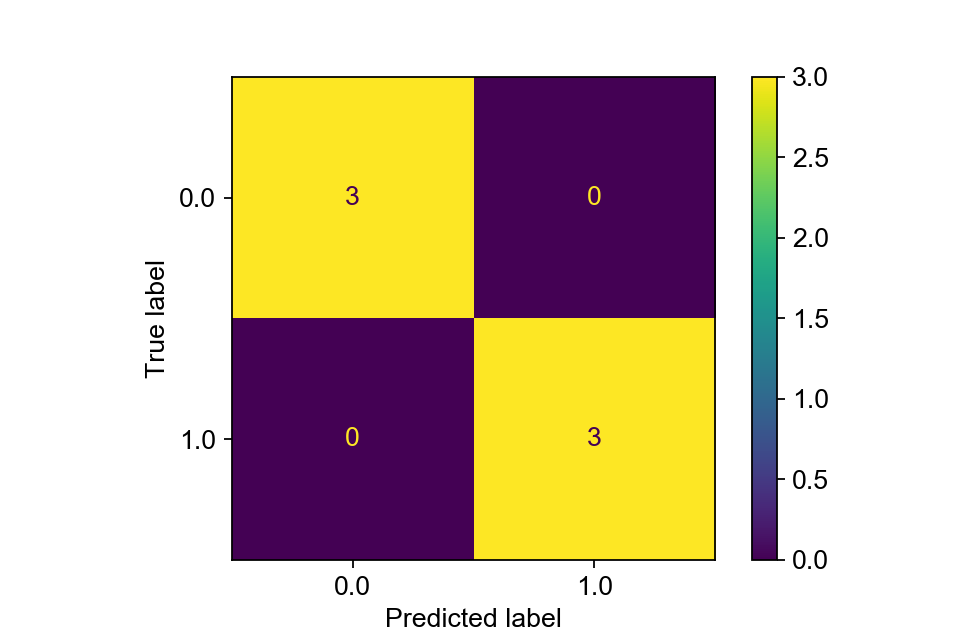

In [13]:
WT_samples = total_dataset_com.filter(regex='B6')
mut_samples = total_dataset_com.filter(regex='1h')

learn_samples = pd.concat([WT_samples,mut_samples],axis=1)
cls = list(np.zeros(len(WT_samples.columns))) + list(np.ones(len(mut_samples.columns)))

svc_TB = SVC(kernel='linear')
svc_TB.fit(learn_samples.transpose(),cls)
norm_vec_TB = - svc_TB.coef_[0]/linalg.norm(svc_TB.coef_[0])
b_coef_TB = svc_TB.intercept_[0]/linalg.norm(svc_TB.coef_[0])

plot_confusion_matrix(svc_TB,learn_samples.transpose(),cls)


<IPython.core.display.Javascript object>


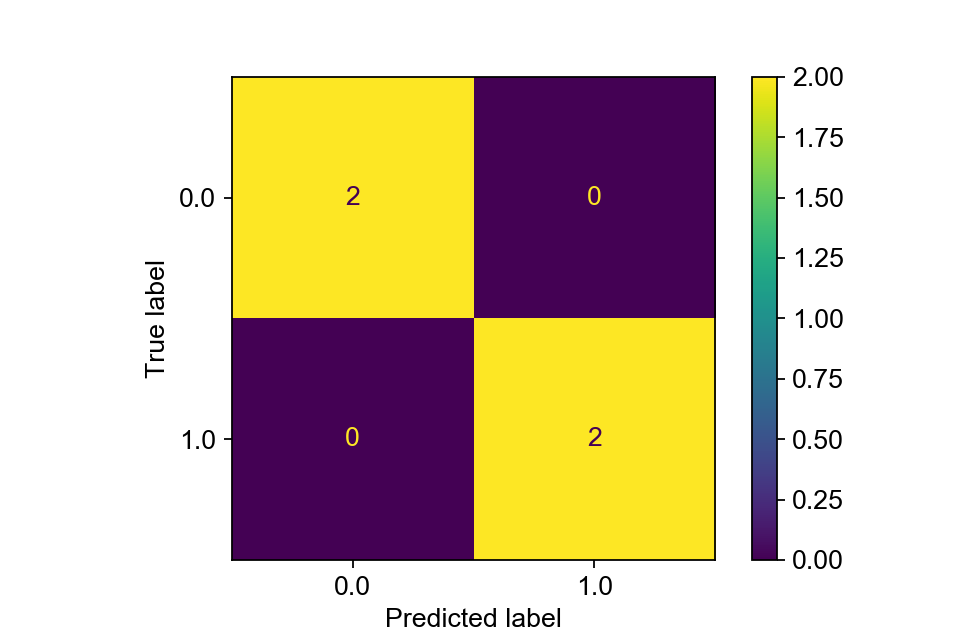

In [14]:
low_samples = total_dataset_com.filter(regex='2ng')
high_samples = total_dataset_com.filter(regex='50ng')

TNF_samples = pd.concat([low_samples,high_samples],axis=1)
cls_TNF = list(np.zeros(len(low_samples.columns))) + list(np.ones(len(high_samples.columns)))

svc_TNF = SVC(kernel='linear')
svc_TNF.fit(TNF_samples.transpose(),cls_TNF)
norm_vec_TNF = svc_TNF.coef_[0]/linalg.norm(svc_TNF.coef_[0])
b_coef_TNF = -svc_TNF.intercept_[0]/linalg.norm(svc_TNF.coef_[0])

plot_confusion_matrix(svc_TNF,TNF_samples.transpose(),cls_TNF)


In [15]:
norm_vec_2D_df = pd.DataFrame(np.array([norm_vec_TNF,norm_vec_TB]),columns=total_dataset_com.index,index=['norm_vec_TNF','norm_vec_TB']).T
norm_vec_2D_df.to_csv('STV_2D.csv')
angle_n_vecs = (np.arccos(np.dot(norm_vec_TNF,norm_vec_TB))/np.pi)*180
print(angle_n_vecs)


89.9999976950594


In [16]:
DPDs_2D_TB = pd.DataFrame(np.zeros((len(total_dataset_com.columns),2)),index=total_dataset_com.columns,columns=['DPD_TNF','DPD_TB'])

for smpl in total_dataset_com.columns:
    DPDs_2D_TB.at[smpl,'DPD_TNF'] = - (b_coef_TNF - np.dot(total_dataset_com[smpl],norm_vec_2D_df['norm_vec_TNF']))
    DPDs_2D_TB.at[smpl,'DPD_TB'] = - (b_coef_TB - np.dot(total_dataset_com[smpl],norm_vec_2D_df['norm_vec_TB']))
        
DPDs_2D_TB.to_csv('DPDs_TB.csv')
DPDs_2D_TB



,DPD_TNF,DPD_TB
B6_2ng_B6_NT1,-36.124596,12.483646
B6_10ng_B6_NT1,-2.970311,12.478412
B6_50ng_B6_NT1,35.080527,12.490171
1h_2ng_1h_NT1,-34.644971,-12.486331
1h_10ng_1h_NT1,12.688983,-12.479563
1h_50ng_1h_NT1,34.644974,-12.486329
UNTREAT1,-40.128066,-0.669719
UNTREAT2,-43.419413,-0.435000
UNTREAT3,-44.574478,0.133430
T_1,-42.016416,0.831826


In [17]:
groups = sorted(list(set(metadata['Group'])))

DPDs_groups = pd.DataFrame(np.zeros((len(groups),4)),index=groups,columns=['DPD_TNF','err_DPD_TNF','DPD_TB','err_DPD_TB'])

for group in groups:
    group_df = total_dataset_com.filter(regex=group+'_*\d')
    DPD_vals = np.zeros((len(total_dataset_com.filter(regex=group+'_*\d').columns),2))
    for i in range(len(group_df.columns)):
        DPD_vals[i,0] = -(b_coef_TNF - np.dot(group_df.iloc[:,i],norm_vec_2D_df['norm_vec_TNF']))
        DPD_vals[i,1] = -(b_coef_TB - np.dot(group_df.iloc[:,i],norm_vec_2D_df['norm_vec_TB']))
    DPDs_groups.at[group,'DPD_TNF'] = statistics.mean(DPD_vals[:,0])
    DPDs_groups.at[group,'DPD_TB']  = statistics.mean(DPD_vals[:,1])
    DPDs_groups.at[group,'err_DPD_TNF'] = np.abs(stats.sem(DPD_vals[:,0])/(statistics.mean(DPD_vals[:,0])))
    DPDs_groups.at[group,'err_DPD_TB']  = np.abs(stats.sem(DPD_vals[:,1])/(statistics.mean(DPD_vals[:,1])))
        
DPDs_groups.to_csv('DPDs_groups_TB.csv')
DPDs_groups


,DPD_TNF,err_DPD_TNF,DPD_TB,err_DPD_TB
M,-30.695796,0.133612,-1.746766,0.621050
T,-20.139412,0.447190,0.050272,52.995345
TM,-39.830908,0.009657,0.664424,0.395324
TMI,-39.256479,0.009661,0.438666,0.577676
TMR,-36.347513,0.013567,3.449863,0.040605
TMRI,-38.304340,0.004404,3.152236,0.037020
TMRS,-33.936136,0.021569,2.513557,0.128966
TMR_b,-34.041587,0.024160,2.683778,0.076178
TMS,-40.023468,0.004134,0.902729,0.362401
TM_b,-42.321128,0.050379,1.738127,0.519412
